In [8]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torchvision import transforms

In [9]:
# train 압축 풀기
# !unzip -qq '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/class_train.zip' -d '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/'

In [10]:
# val 압축 풀기
# !unzip -qq '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/class_val.zip' -d '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/'

In [11]:
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/class_train'
val_data_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/class_val'

In [12]:
## 모델 학습 설정값.
hyperparams = {
    "batch_size": 12,
    "learning_rate": 0.001,
    "epochs": 50,
}

In [13]:
## 이미지 변환 모듈 (데이터의 규격을 맞춘다)
transform_train = transforms.Compose(
    [
        transforms.Resize([224, 224]),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        # transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]
)

transform_val = transforms.Compose(
    [
        transforms.Resize([224, 224]),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]
)

In [14]:
## 데이터 세트를 정의한다. (이미지 폴더를 기준으로)
train_dataset = ImageFolder(train_data_dir, transform=transform_train)
val_dataset = ImageFolder(val_data_dir, transform=transform_val)

In [15]:
## 데이터 개수 확인
print('train 데이터개수:', len(train_dataset))
print('val 데이터 개수:',len(val_dataset))

train 데이터개수: 3150
val 데이터 개수: 350


In [16]:
# 클래스 개수 가져오기
train_num_classes = len(train_dataset.classes)
val_num_classes = len(val_dataset.classes)
print(f"Number of classes of Train: {train_num_classes}")
print(f"Number of classes of Val: {val_num_classes}")

Number of classes of Train: 50
Number of classes of Val: 50


In [17]:
# 클래스 이름 가져오기
class_names = train_dataset.classes
print(f"Classes: {class_names}")

Classes: ['[강레오] 고등어구이', '[우정욱] 채소 듬뿍 궁중떡볶이', '간장 가지덮밥', '감자북엇국', '고구마밥', '고추전', '곤드레전', '굴순두부찌개', '근대 된장국', '김국', '김치 비빔 국수', '김치말이두부찜', '꼬막장', '냉이 차돌박이 솥밥', '닭가슴살 깻잎전', '당근전', '대패삼겹살고추장찌개', '대패삼겹살된장찌개', '도토리묵', '들깨감잣국', '들깨무채국', '만능 땡초장', '멍게비빔밥', '모둠버섯찌개', '목살김치찜', '미더덕 된장찌개', '미소 청국장', '미역오이냉국', '부지깽이 도토리부침개', '새우부추전', '섬초 된장국', '성게미역국', '쇠고기 미역국', '쑥국', '아욱 된장국', '얼갈이배추 된장국', '열무김치', '완두콩밥', '왕소시지김밥', '제주식 고사리육개장', '참가자미미역국', '채식구절판', '케일 강된장쌈밥', '콩나물제육볶음', '통현미 버섯 비빔밥', '파채불고기', '표고버섯 덮밥', '호박국', '홍합탕', '황태갈비']


In [18]:
# 데이터로더 import
from torch.utils.data import DataLoader

In [19]:
## 배치 사이즈 : 한번에 불러올 데이터 개수
## shuffle : 순서를 랜덤하게 (중요!)
train_dataloader = DataLoader(
    train_dataset, batch_size=hyperparams['batch_size'], shuffle=True, drop_last=True
)
val_dataloader = DataLoader(
    val_dataset, batch_size=hyperparams['batch_size'], shuffle=False, drop_last=False
)

In [20]:
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

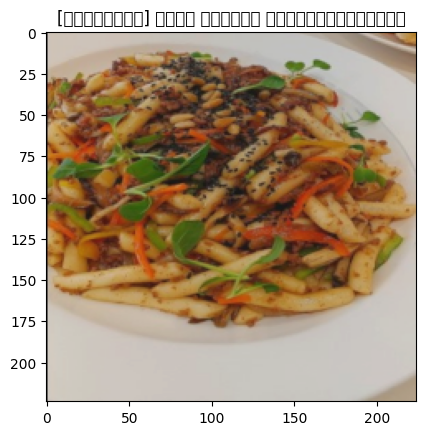

In [21]:
# 데이터셋 불러와서 확인
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

## 데이터로더에서 데이터를 불러와서 출력한다.
## 데이터 변환 모듈로 정규화를 수행했기 때문에 다시 원본으로 돌려놓는 연산이 추가된다.
for image, label in train_dataloader:
    image = image[0]
    label = label[0]
    image = image.numpy().transpose((1, 2, 0))
    image = ((std * image + mean) * 255).astype(np.uint8)
    plt.imshow(image)
    plt.title(train_dataset.classes[int(label)])
    plt.show()

    break

In [22]:
# timm 라이브러리 다운
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.7 MB/s eta 0:00:00


In [23]:
import torch.nn
import timm

In [24]:
# resnet50 모델 불러오기 (사전 훈련된 가중치 포함), 클래스 개수는 데이터세트에 맞게 설정
model = timm.create_model('resnet50', pretrained=True, num_classes=train_num_classes)

print(model)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [25]:
import os
import torch.nn as nn
from torch import optim
from torch.nn import functional as F
from tqdm import tqdm

In [26]:
## GPU가 있으면 연산장치를 "cuda"로 설정하고 아니면 "cpu"로 설정한다.
device = "cuda" if torch.cuda.is_available() else "cpu"

## 모델에 연상장치를 설정하고 학습 모드로 변경한다.
model = model.to(device).train()

## 학습할 때 사용할 loss 함수를 정의한다. 여기서는 cross-entropy를 사용
criterion = nn.CrossEntropyLoss().to(device)

## 학습 방법 (옵티마이저)를 설정한다. 기본적인 SGD를 사용한다.
optimizer = optim.Adam(
    model.parameters(),
    lr=hyperparams['learning_rate'] ## 학습률 (전이 학습이기 때문에 낮게 설정한다.)
)

'''
	iteration(이터레이션) : 데이터를 한번 입력하는 단위. 전체 데이터를 나눠서 입력한다.
	epoch(에폭, 이포크) : 전체 데이터를 다 입력했을 때 단위. 보통 전체 데이터를 여러번 학습한다.

'''

for epoch in range(hyperparams['epochs']):
    model.train()
    cost = 0.0

		## 데이터 로더에서 변환된 이미지 데이터와 클래스 번호를 불러와 학습한다.
		## for문에서 한번 호출될 때를 iteration이라 하며 for문을 전부 다 돌면 epoch이라 한다.
    for images, classes in tqdm(train_dataloader):
        images = images.to(device) ## 데이터에도 연산 장치를 설정
        classes = classes.to(device) ## 데이터에도 연산 장치를 설정

        optimizer.zero_grad() ## 옵티마이저에 저장된 기울기 값을 초기화한다.
        output = model(images) ## 모델에 데이터를 입력하여 출력값을 생성
        loss = criterion(output, classes) ## 출력값 <> 정답값(클래스)를 비교하여 loss를 계산
        loss.backward() ## 계산한 loss를 backpropagation(역전파)
        optimizer.step() ## 학습 수행

        cost += loss.item() ## 전체 loss 저장
    cost = cost / len(train_dataloader)
    print(f"Epoch : {epoch + 1:4d}, Cost : {cost:.3f}")

    correct = 0
    total = 0

		## 검증 로직
    with torch.no_grad():  # 기울기 계산 비활성화
        model.eval()
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)

            # 예측 값 계산
            outputs = model(images)

						## 출력 클래스 중 가장 큰 값을 모델의 예측 값으로 설정
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
						## 출력 값과 정답값이 일치하는 경우를 계산
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total ## 정답값과 모델의 예측값이 일치하는 비율 계산(Top1 정확도)
    print(f"Validation Accuracy: {accuracy:.2f}%")

## 학습 결과를 저장
model_save_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project'
os.makedirs(model_save_dir, exist_ok=True)
torch.save(model.state_dict(), os.path.join(model_save_dir, 'resnet50.pth'))
print("Saved the model weights")

100%|██████████| 262/262 [38:37<00:00,  8.85s/it]


Epoch :    1, Cost : 2.331
Validation Accuracy: 53.71%


100%|██████████| 262/262 [00:57<00:00,  4.54it/s]


Epoch :    2, Cost : 1.064
Validation Accuracy: 64.86%


100%|██████████| 262/262 [00:52<00:00,  4.97it/s]


Epoch :    3, Cost : 0.716
Validation Accuracy: 65.71%


100%|██████████| 262/262 [00:52<00:00,  4.99it/s]


Epoch :    4, Cost : 0.475
Validation Accuracy: 71.14%


100%|██████████| 262/262 [00:52<00:00,  4.99it/s]


Epoch :    5, Cost : 0.398
Validation Accuracy: 73.14%


100%|██████████| 262/262 [00:52<00:00,  5.03it/s]


Epoch :    6, Cost : 0.250
Validation Accuracy: 68.29%


100%|██████████| 262/262 [00:52<00:00,  5.01it/s]


Epoch :    7, Cost : 0.239
Validation Accuracy: 70.29%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :    8, Cost : 0.187
Validation Accuracy: 66.29%


100%|██████████| 262/262 [00:51<00:00,  5.05it/s]


Epoch :    9, Cost : 0.173
Validation Accuracy: 73.43%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   10, Cost : 0.132
Validation Accuracy: 69.43%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   11, Cost : 0.114
Validation Accuracy: 70.57%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   12, Cost : 0.097
Validation Accuracy: 69.14%


100%|██████████| 262/262 [00:52<00:00,  5.02it/s]


Epoch :   13, Cost : 0.105
Validation Accuracy: 73.71%


100%|██████████| 262/262 [00:52<00:00,  5.01it/s]


Epoch :   14, Cost : 0.116
Validation Accuracy: 72.00%


100%|██████████| 262/262 [00:52<00:00,  5.02it/s]


Epoch :   15, Cost : 0.105
Validation Accuracy: 68.86%


100%|██████████| 262/262 [00:52<00:00,  5.01it/s]


Epoch :   16, Cost : 0.089
Validation Accuracy: 66.29%


100%|██████████| 262/262 [00:52<00:00,  5.01it/s]


Epoch :   17, Cost : 0.090
Validation Accuracy: 68.86%


100%|██████████| 262/262 [00:52<00:00,  5.02it/s]


Epoch :   18, Cost : 0.097
Validation Accuracy: 70.29%


100%|██████████| 262/262 [00:52<00:00,  5.02it/s]


Epoch :   19, Cost : 0.075
Validation Accuracy: 69.71%


100%|██████████| 262/262 [00:52<00:00,  5.02it/s]


Epoch :   20, Cost : 0.087
Validation Accuracy: 72.86%


100%|██████████| 262/262 [00:51<00:00,  5.06it/s]


Epoch :   21, Cost : 0.069
Validation Accuracy: 72.57%


100%|██████████| 262/262 [00:51<00:00,  5.06it/s]


Epoch :   22, Cost : 0.063
Validation Accuracy: 66.86%


100%|██████████| 262/262 [00:51<00:00,  5.07it/s]


Epoch :   23, Cost : 0.067
Validation Accuracy: 68.00%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   24, Cost : 0.074
Validation Accuracy: 71.14%


100%|██████████| 262/262 [00:51<00:00,  5.06it/s]


Epoch :   25, Cost : 0.039
Validation Accuracy: 71.14%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   26, Cost : 0.052
Validation Accuracy: 68.00%


100%|██████████| 262/262 [00:52<00:00,  5.03it/s]


Epoch :   27, Cost : 0.068
Validation Accuracy: 62.86%


100%|██████████| 262/262 [00:52<00:00,  5.02it/s]


Epoch :   28, Cost : 0.061
Validation Accuracy: 67.43%


100%|██████████| 262/262 [00:52<00:00,  5.03it/s]


Epoch :   29, Cost : 0.083
Validation Accuracy: 70.29%


100%|██████████| 262/262 [00:52<00:00,  4.99it/s]


Epoch :   30, Cost : 0.067
Validation Accuracy: 71.71%


100%|██████████| 262/262 [00:52<00:00,  5.02it/s]


Epoch :   31, Cost : 0.066
Validation Accuracy: 69.14%


100%|██████████| 262/262 [00:52<00:00,  5.01it/s]


Epoch :   32, Cost : 0.031
Validation Accuracy: 71.43%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   33, Cost : 0.047
Validation Accuracy: 68.57%


100%|██████████| 262/262 [00:52<00:00,  5.01it/s]


Epoch :   34, Cost : 0.020
Validation Accuracy: 74.29%


100%|██████████| 262/262 [00:51<00:00,  5.05it/s]


Epoch :   35, Cost : 0.034
Validation Accuracy: 67.14%


100%|██████████| 262/262 [00:52<00:00,  5.04it/s]


Epoch :   36, Cost : 0.075
Validation Accuracy: 68.29%


100%|██████████| 262/262 [00:51<00:00,  5.07it/s]


Epoch :   37, Cost : 0.056
Validation Accuracy: 69.14%


100%|██████████| 262/262 [00:51<00:00,  5.07it/s]


Epoch :   38, Cost : 0.044
Validation Accuracy: 73.43%


100%|██████████| 262/262 [00:51<00:00,  5.06it/s]


Epoch :   39, Cost : 0.042
Validation Accuracy: 68.57%


100%|██████████| 262/262 [00:51<00:00,  5.06it/s]


Epoch :   40, Cost : 0.065
Validation Accuracy: 70.57%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   41, Cost : 0.030
Validation Accuracy: 72.29%


100%|██████████| 262/262 [00:52<00:00,  5.03it/s]


Epoch :   42, Cost : 0.036
Validation Accuracy: 74.00%


100%|██████████| 262/262 [00:52<00:00,  5.04it/s]


Epoch :   43, Cost : 0.028
Validation Accuracy: 74.00%


100%|██████████| 262/262 [00:51<00:00,  5.05it/s]


Epoch :   44, Cost : 0.044
Validation Accuracy: 68.86%


100%|██████████| 262/262 [00:52<00:00,  5.04it/s]


Epoch :   45, Cost : 0.049
Validation Accuracy: 71.43%


100%|██████████| 262/262 [00:51<00:00,  5.05it/s]


Epoch :   46, Cost : 0.048
Validation Accuracy: 67.43%


100%|██████████| 262/262 [00:52<00:00,  5.03it/s]


Epoch :   47, Cost : 0.030
Validation Accuracy: 70.29%


100%|██████████| 262/262 [00:52<00:00,  5.04it/s]


Epoch :   48, Cost : 0.029
Validation Accuracy: 70.29%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   49, Cost : 0.029
Validation Accuracy: 71.71%


100%|██████████| 262/262 [00:51<00:00,  5.04it/s]


Epoch :   50, Cost : 0.028
Validation Accuracy: 67.14%
Saved the model weights


In [27]:
# 틀린 데이터 알아보기.
import pandas as pd
from glob import glob
from PIL import Image

In [28]:
# 틀린 데이터에 대해 알아본다.
file_name_list = []
file_class_list = []
prob_list = [] ## 모델이 예측한 확률값 목록
pred_list = [] ## 모델이 예측한 클래스 목록 (가장 높은 확률값의 클래스)
with torch.no_grad():
  test_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/class_val' ## 검증하고 싶은 데이터의 루트 폴더 경로
  for file_path in glob(f"{test_dir}/**/*"): ## 파일 탐색
      file_class = file_path.split('/')[-2]
      file_name = file_path.split('/')[-1]
      file_class_list.append(file_class)
      file_name_list.append(file_name)

      image = Image.open(file_path).convert('RGB')
      input_image = transform_train(image).unsqueeze(0).to(device) ## 이미지를 변환하고 배치 형태로 변환 (나중에 설명)
      outputs = model(input_image)

      prob = F.softmax(outputs, dim=1) ## softmax로 확률값 계산
      pred = torch.topk(prob, k = 4, dim=1)

      prob_list.append(prob[0].cpu().numpy().tolist()) ## 결과값을 list로 변환하고 적재
      pred_list.append(pred[0].cpu().numpy().tolist()) ## 결과값을 list로 변환하고 적재

In [29]:
df = pd.DataFrame() ## 데이터프레임 생성
df['file_class'] = file_class_list
df['file_name'] = file_name_list

pred_name_list = []
for pred in pred_list:
    pred_name_list.append(class_names[pred])
df['pred'] = pred_name_list
for idx, probs in enumerate(zip(*prob_list)):
    df[class_names[idx]] = probs

TypeError: ignored

In [ ]:
df.head() ## 샘플 테이블 출력

In [ ]:
df.to_csv('pred_results3.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(df.file_class, df.pred)

sns.heatmap(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()